<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    flo

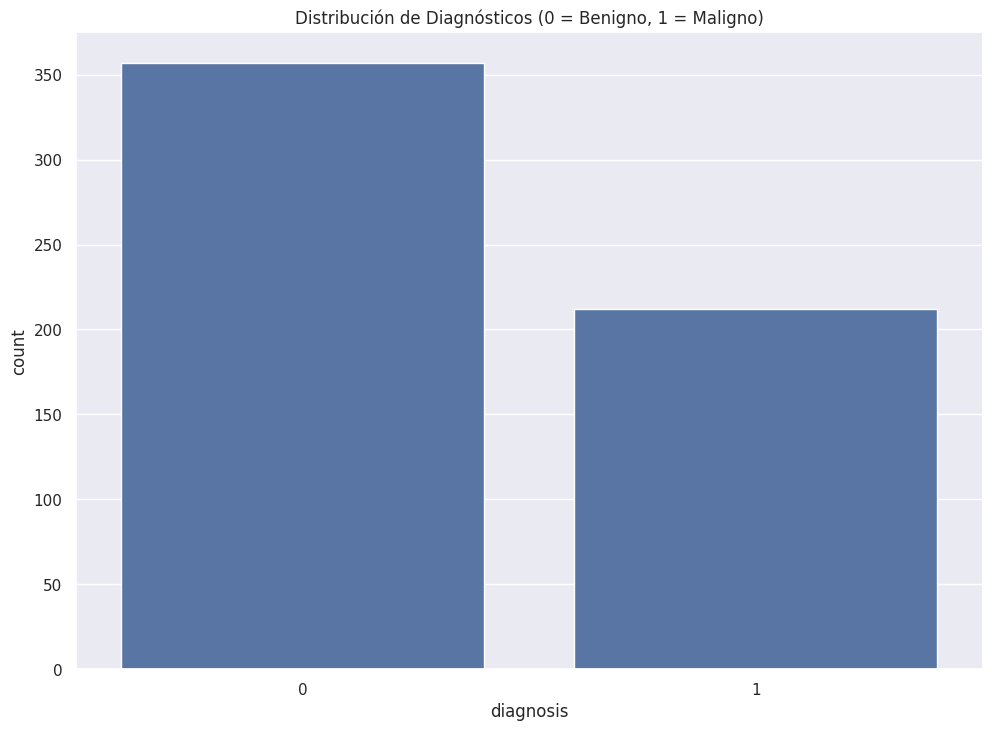

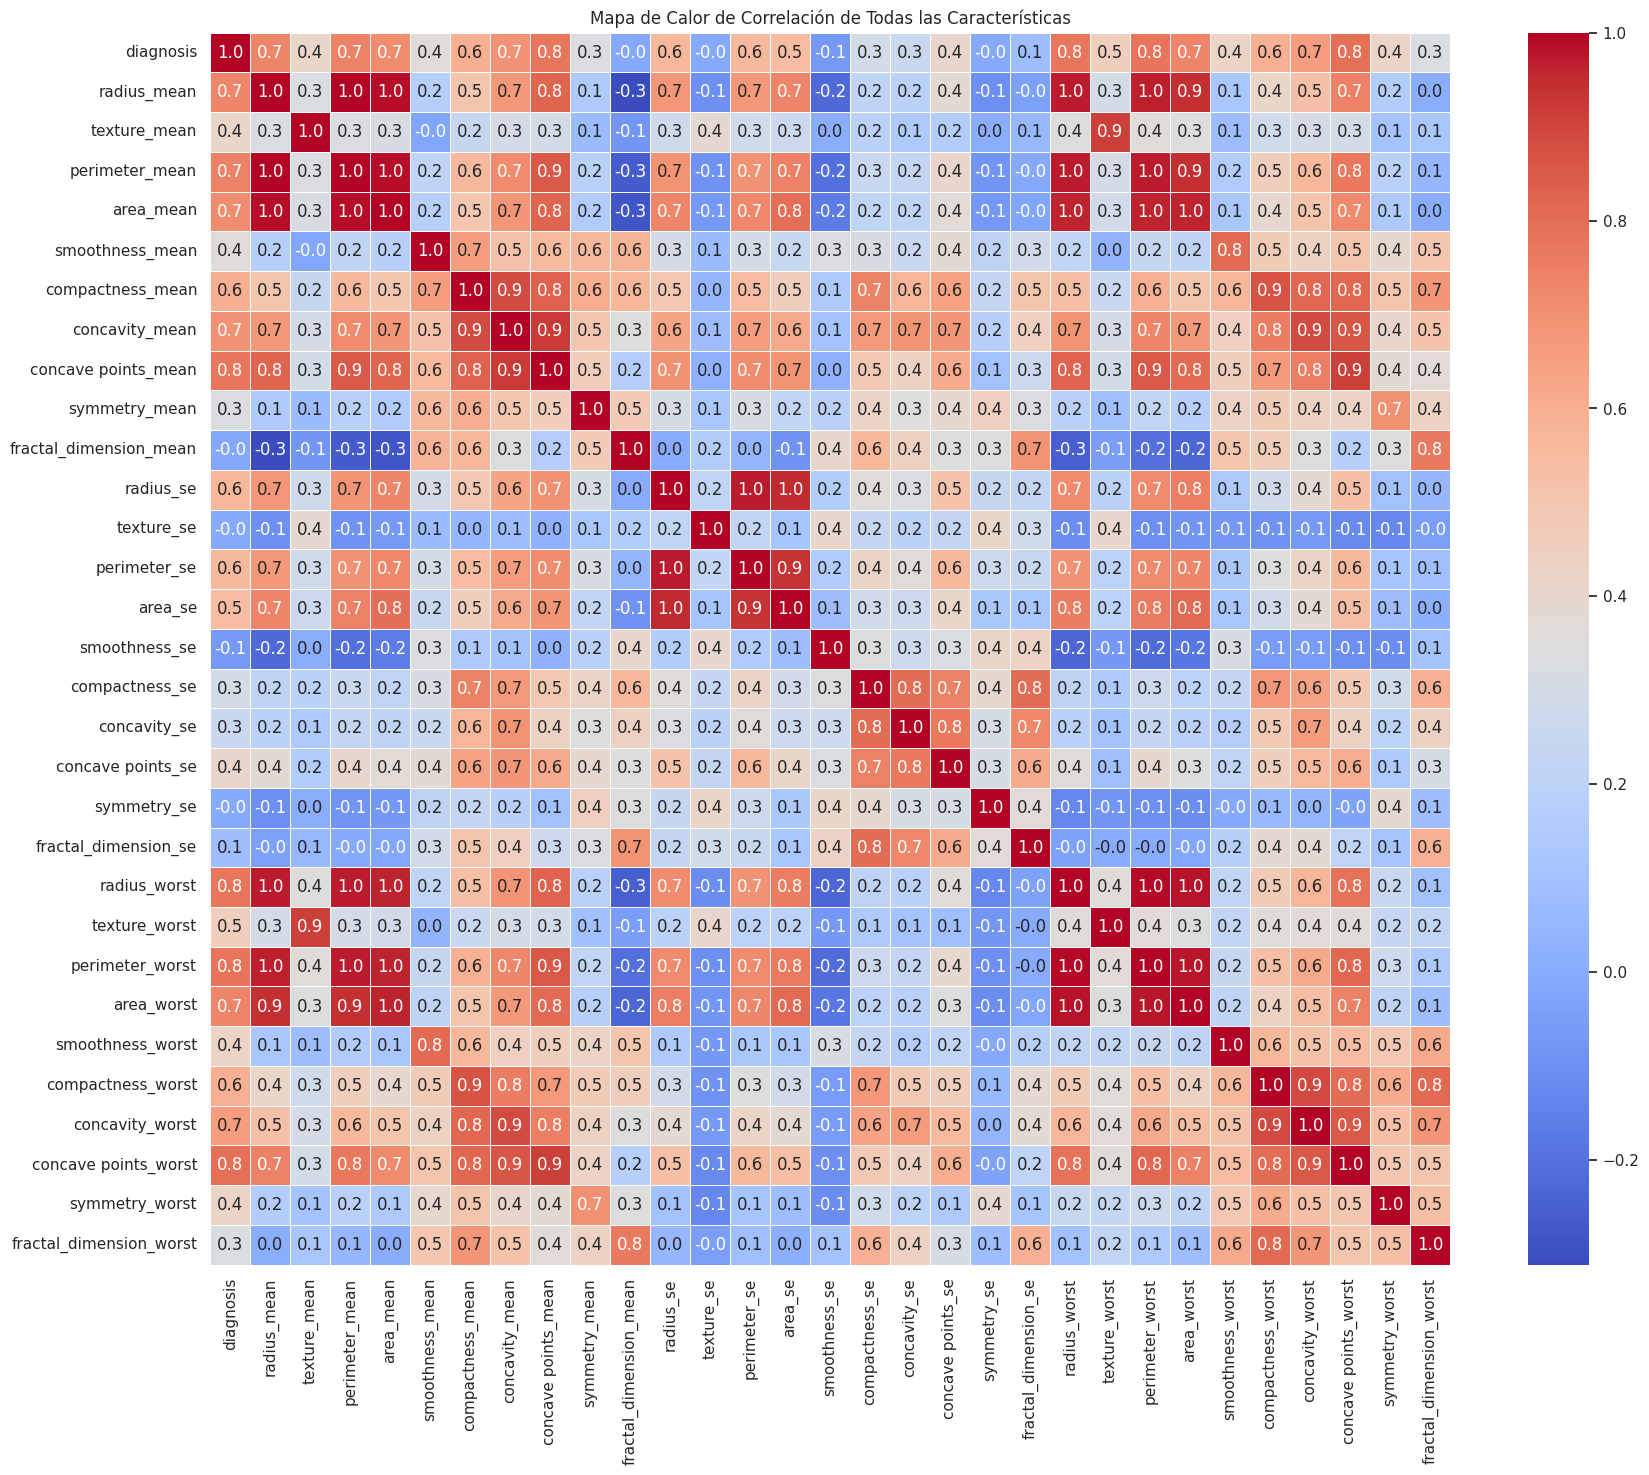

--- Correlación con 'diagnosis' ---
diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0

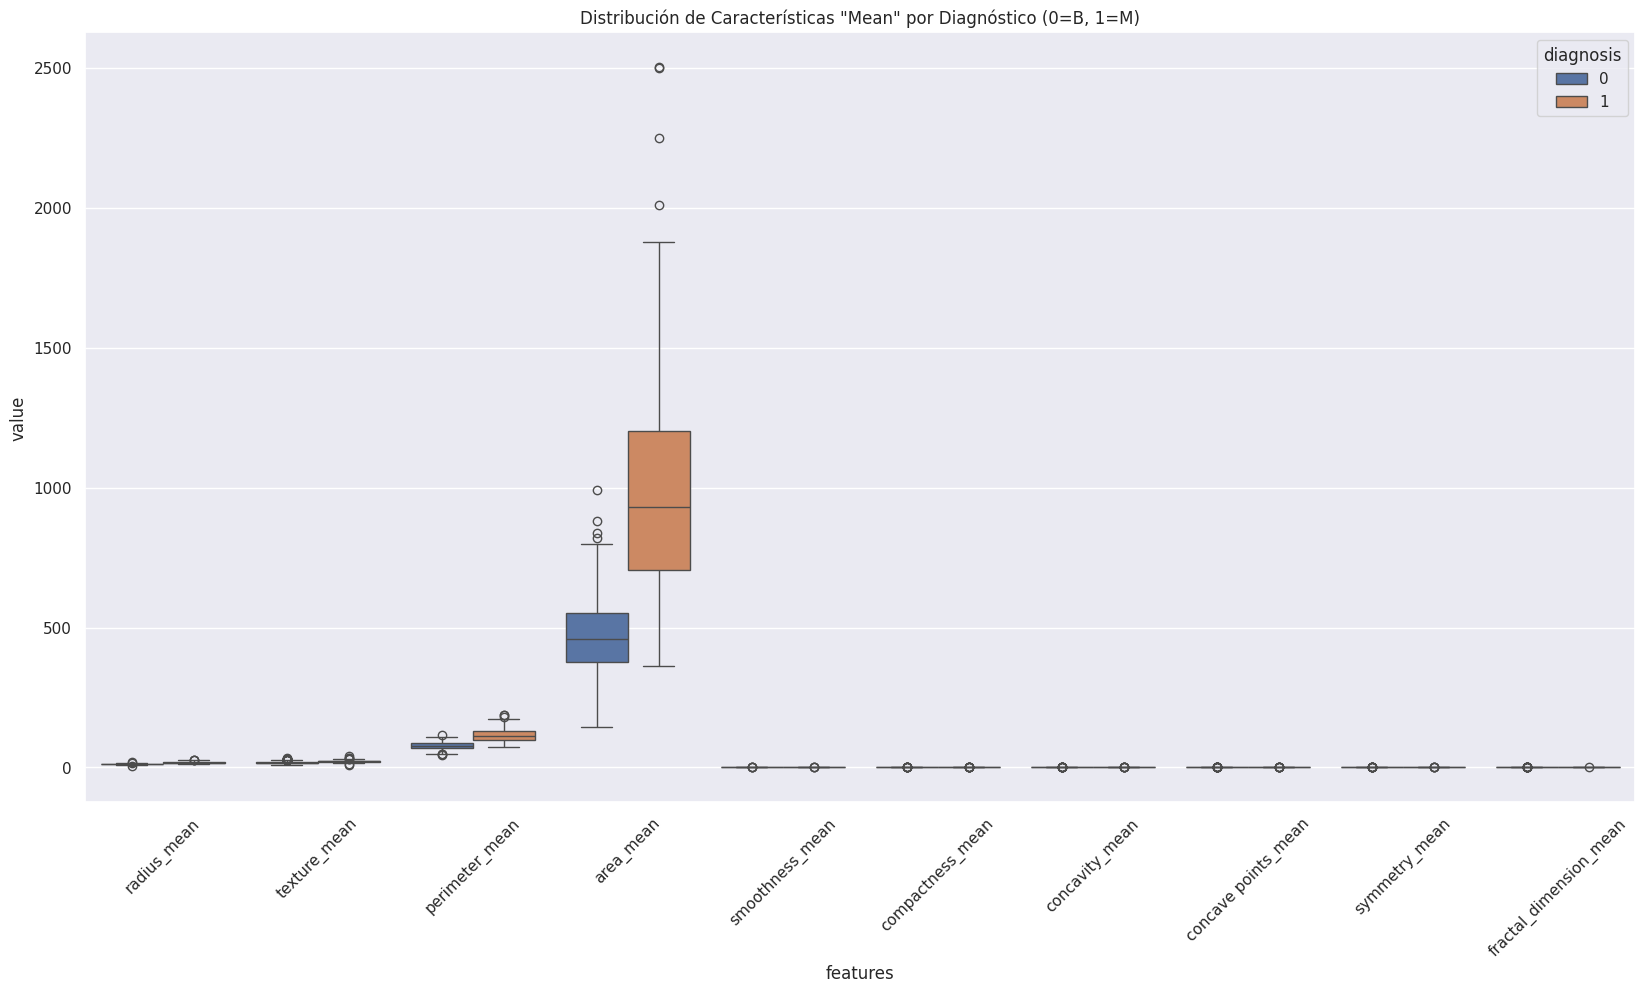

--- Resumen del EDA ---
1. **Datos:** El dataset tiene 569 entradas y 31 columnas (1 objetivo, 30 características). No hay valores nulos.
2. **Balance de Clases:** Hay 357 tumores benignos (0) y 212 malignos (1). Es un dataset algo desbalanceado, pero no de forma crítica.
3. **Multicolinealidad:** El mapa de calor muestra una multicolinealidad extremadamente alta entre ciertas variables.
   - 'radius_mean', 'perimeter_mean', y 'area_mean' están casi perfectamente correlacionadas (r > 0.99).
   - Lo mismo ocurre con sus contrapartes '_se' y '_worst'.
   - Esto sugiere que podemos eliminar algunas de estas variables en el preprocesamiento sin perder información.
4. **Capacidad Discriminativa:**
   - Variables como 'concave points_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'perimeter_mean' y 'area_mean' tienen la correlación positiva más alta con 'diagnosis' (maligno).
   - Los boxplots confirman esto visualmente. Para casi todas las características 'mean', los tumo

In [2]:
# 1. Análisis exploratorio profundo (EDA)

# --- Información General y Valores Nulos ---
print("--- Información del DataFrame ---")
df.info()
print("\n")

# --- Resumen Estadístico ---
print("--- Descripción Estadística ---")
# Usamos .T para transponer y facilitar la lectura
print(df.describe().T)
print("\n")

# --- Distribución de la Variable Objetivo ---
print("--- Distribución de Clases (Diagnosis) ---")
print(df['diagnosis'].value_counts())
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Diagnósticos (0 = Benigno, 1 = Maligno)')
plt.show()

# --- Análisis de Correlación ---
# Calcular la correlación
corr_matrix = df.corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Todas las Características')
plt.show()

# Correlación específica con la variable 'diagnosis'
corr_diagnosis = corr_matrix['diagnosis'].sort_values(ascending=False)
print("--- Correlación con 'diagnosis' ---")
print(corr_diagnosis)
print("\n")

# --- Visualización de Variables Discriminativas ---
# Basado en la correlación, las variables '_mean', '_worst' y 'concave points' son muy relevantes.
# Vamos a comparar la distribución de las 10 características "mean" entre benignos y malignos.

# Filtramos las columnas que terminan en '_mean' y añadimos 'diagnosis'
mean_cols = [col for col in df.columns if col.endswith('_mean')]
mean_cols.append('diagnosis')
df_mean = df[mean_cols]

# Usamos pd.melt para "derretir" el dataframe y facilitar el ploteo con seaborn
df_melted = pd.melt(df_mean, id_vars='diagnosis', var_name='features', value_name='value')

# Creamos un boxplot para cada característica 'mean', separada por diagnóstico
plt.figure(figsize=(20, 10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=df_melted)
plt.xticks(rotation=45) # Rotamos las etiquetas para mejor legibilidad
plt.title('Distribución de Características "Mean" por Diagnóstico (0=B, 1=M)')
plt.show()

# --- Discusión de EDA (Resumen en print) ---
print("--- Resumen del EDA ---")
print("1. **Datos:** El dataset tiene 569 entradas y 31 columnas (1 objetivo, 30 características). No hay valores nulos.")
print("2. **Balance de Clases:** Hay 357 tumores benignos (0) y 212 malignos (1). Es un dataset algo desbalanceado, pero no de forma crítica.")
print("3. **Multicolinealidad:** El mapa de calor muestra una multicolinealidad extremadamente alta entre ciertas variables.")
print("   - 'radius_mean', 'perimeter_mean', y 'area_mean' están casi perfectamente correlacionadas (r > 0.99).")
print("   - Lo mismo ocurre con sus contrapartes '_se' y '_worst'.")
print("   - Esto sugiere que podemos eliminar algunas de estas variables en el preprocesamiento sin perder información.")
print("4. **Capacidad Discriminativa:**")
print("   - Variables como 'concave points_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'perimeter_mean' y 'area_mean' tienen la correlación positiva más alta con 'diagnosis' (maligno).")
print("   - Los boxplots confirman esto visualmente. Para casi todas las características 'mean', los tumores malignos (1) tienden a tener valores medios más altos (mayor radio, área, concavidad, etc.) que los tumores benignos (0).")
print("   - Las variables 'concave points_mean', 'concavity_mean', 'radius_mean', 'perimeter_mean' y 'area_mean' muestran una separación visual muy clara entre las dos clases, sugiriendo un alto poder predictivo.")


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [3]:
# 2. Preprocesamiento de datos

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Separación de X e y ---
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"Shape original de X: {X.shape}")

# --- Estrategia Adicional: Eliminación de Multicolinealidad ---
# Justificación: Como vimos en el EDA, existe una correlación casi perfecta (r > 0.99)
# entre (radius, perimeter, area) para cada tipo de medida (mean, se, worst).
# Mantenerlas todas es redundante y puede afectar a algunos modelos.
# Decidimos eliminar 'perimeter' y 'area' de cada grupo, conservando 'radius'
# como la medida base de tamaño.
cols_to_drop = [
    'perimeter_mean', 'area_mean',
    'perimeter_se', 'area_se',
    'perimeter_worst', 'area_worst'
]
X_processed = X.drop(columns=cols_to_drop)

print(f"Shape de X tras eliminar multicolinealidad: {X_processed.shape}")
print(f"Columnas eliminadas: {cols_to_drop}")


# --- División en Train y Test ---
# Es fundamental dividir ANTES de escalar, para evitar "data leakage" (fuga de datos)
# del conjunto de test hacia el de entrenamiento (al ajustar el escalador).
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.3,    # 30% para test
    random_state=42,  # Para reproducibilidad
    stratify=y        # Mantiene la proporción de clases en train y test
)

print(f"\nShape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")


# --- Normalización (StandardScaler) ---
# Justificación: Se elige StandardScaler porque muchos modelos (como SVM y Regresión Logística)
# y métodos de reducción de dimensionalidad (PCA) son sensibles a la escala de las
# características. Este escalador centra los datos en 0 con desviación estándar 1.

# 1. Crear la instancia del escalador
scaler = StandardScaler()

# 2. Ajustar (fit) el escalador SÓLO con los datos de entrenamiento
scaler.fit(X_train)

# 3. Transformar (transform) ambos conjuntos: train y test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertimos de nuevo a DataFrame para ver el resultado (opcional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_processed.columns)
print("\n--- Muestra de datos escalados (train) ---")
print(X_train_scaled_df.head())
print("\n--- Media (debe ser cercana a 0) ---")
print(X_train_scaled_df.mean())
print("\n--- Desviación Estándar (debe ser cercana a 1) ---")
print(X_train_scaled_df.std())

Shape original de X: (569, 30)
Shape de X tras eliminar multicolinealidad: (569, 24)
Columnas eliminadas: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst']

Shape X_train: (398, 24)
Shape X_test: (171, 24)

--- Muestra de datos escalados (train) ---
   radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0     1.705820      1.049745         2.276458          4.544295   
1     0.536388     -0.909945        -0.065868          0.644945   
2    -0.131456     -0.993336        -0.916169         -0.508574   
3     0.928077      1.418055         0.329734          0.223748   
4     0.144699     -0.972488         1.205760          0.585041   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0        3.539139             2.848393       4.032390                2.639773   
1        0.393543             0.557002      -0.116781               -0.401530   
2       -0.567530            -0.606645      -0.079867         


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


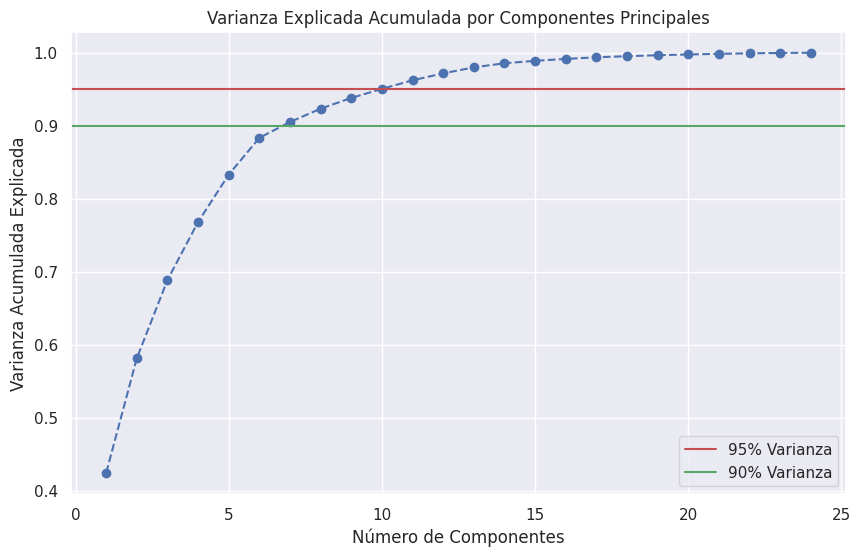

Número de componentes para explicar el 95% de la varianza: 10

Dimensiones originales (después de preprocesar): 24
Dimensiones reducidas con PCA (95% varianza): 10


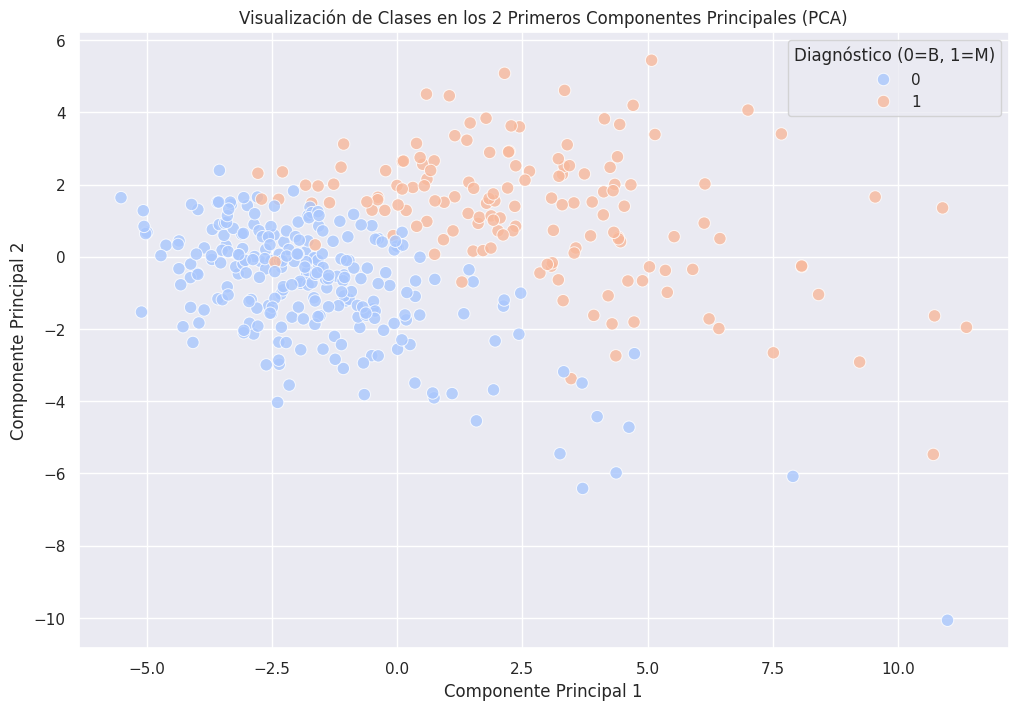


--- Discusión de PCA ---
1. **Varianza Explicada:** El gráfico muestra que podemos retener el 95% de la varianza total de los datos usando solo 10 componentes, reduciendo la dimensionalidad de 24 a 10.
2. **Visualización (PC1 vs PC2):** El gráfico de dispersión de los dos primeros componentes (que son los que más varianza capturan) muestra una separación notable entre las dos clases (Benigno y Maligno).
3. **Separabilidad:** Aunque hay algo de solapamiento, las clases forman cúmulos bastante distintos. Los tumores malignos (rojos) tienden a agruparse en la zona de valores positivos de PC1, mientras que los benignos (azules) se concentran en valores negativos. Esto es un excelente indicador de que los modelos de clasificación podrán encontrar un hiperplano o regla de decisión efectiva para separarlos.


In [4]:
# 3. Reducción de dimensionalidad (PCA)
from sklearn.decomposition import PCA

# --- Análisis de Varianza Explicada ---
# Aplicamos PCA a los datos de entrenamiento escalados, sin definir n_components
# para poder analizar cuánta varianza explica cada componente.
pca_full = PCA(random_state=42)
pca_full.fit(X_train_scaled)

# Calculamos la varianza explicada acumulada
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Graficamos la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Varianza') # Umbral del 95%
plt.axhline(y=0.90, color='g', linestyle='-', label='90% Varianza') # Umbral del 90%
plt.legend(loc='best')
plt.show()

# Encontrar el número de componentes para > 95% de varianza
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Número de componentes para explicar el 95% de la varianza: {n_components_95}")


# --- Aplicación de PCA con n_components seleccionado ---
# Decidimos usar PCA(n_components=0.95), que automáticamente seleccionará
# el número de componentes necesarios para retener el 95% de la varianza.
# Basado en el gráfico, serán alrededor de 10 componentes.

pca = PCA(n_components=0.95, random_state=42)

# Ajustamos y transformamos el set de entrenamiento
X_train_pca = pca.fit_transform(X_train_scaled)

# Transformamos el set de test (usando el ajuste de train)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nDimensiones originales (después de preprocesar): {X_train_scaled.shape[1]}")
print(f"Dimensiones reducidas con PCA (95% varianza): {X_train_pca.shape[1]}")


# --- Visualización de Clases en el Espacio Reducido ---
# Graficamos los primeros dos componentes principales (PC1 y PC2)
# y coloreamos los puntos según su diagnóstico (y_train).

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_train_pca[:, 0],  # Componente Principal 1
    y=X_train_pca[:, 1],  # Componente Principal 2
    hue=y_train,          # Color por diagnóstico
    palette='coolwarm',   # Paleta (0=azul, 1=rojo)
    alpha=0.8,
    s=80                  # Tamaño de los puntos
)
plt.title('Visualización de Clases en los 2 Primeros Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Diagnóstico (0=B, 1=M)')
plt.grid(True)
plt.show()

print("\n--- Discusión de PCA ---")
print("1. **Varianza Explicada:** El gráfico muestra que podemos retener el 95% de la varianza total de los datos usando solo 10 componentes, reduciendo la dimensionalidad de 24 a 10.")
print("2. **Visualización (PC1 vs PC2):** El gráfico de dispersión de los dos primeros componentes (que son los que más varianza capturan) muestra una separación notable entre las dos clases (Benigno y Maligno).")
print("3. **Separabilidad:** Aunque hay algo de solapamiento, las clases forman cúmulos bastante distintos. Los tumores malignos (rojos) tienden a agruparse en la zona de valores positivos de PC1, mientras que los benignos (azules) se concentran en valores negativos. Esto es un excelente indicador de que los modelos de clasificación podrán encontrar un hiperplano o regla de decisión efectiva para separarlos.")


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


--- Ajustando Hiperparámetros para: Logistic Regression ---
Mejores parámetros: {'C': 0.1, 'penalty': 'l2'}
Mejor F1-score (CV): 0.9586
Métricas en Test: F1=0.9683, AUC=0.9980

--- Ajustando Hiperparámetros para: SVM ---
Mejores parámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mejor F1-score (CV): 0.9613
Métricas en Test: F1=0.9593, AUC=0.9971

--- Ajustando Hiperparámetros para: Random Forest ---
Mejores parámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Mejor F1-score (CV): 0.9242
Métricas en Test: F1=0.9355, AUC=0.9901

--- Comparativa de Métricas de Modelos (en Test) ---
                     Accuracy Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.976608  0.983871  0.953125  0.968254  0.997956
SVM                   0.97076       1.0  0.921875   0.95935  0.997079
Random Forest        0.953216  0.966667   0.90625  0.935484   0.99007


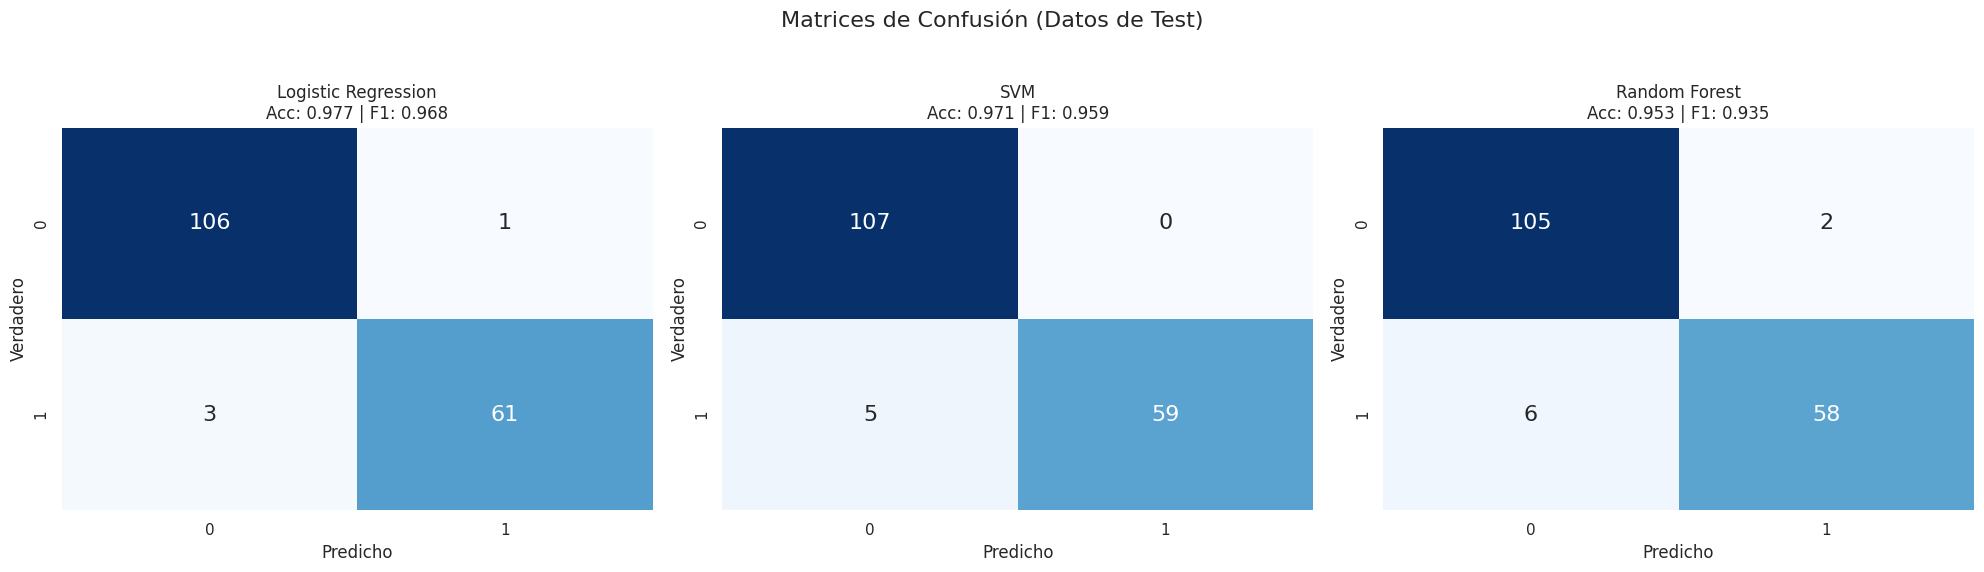

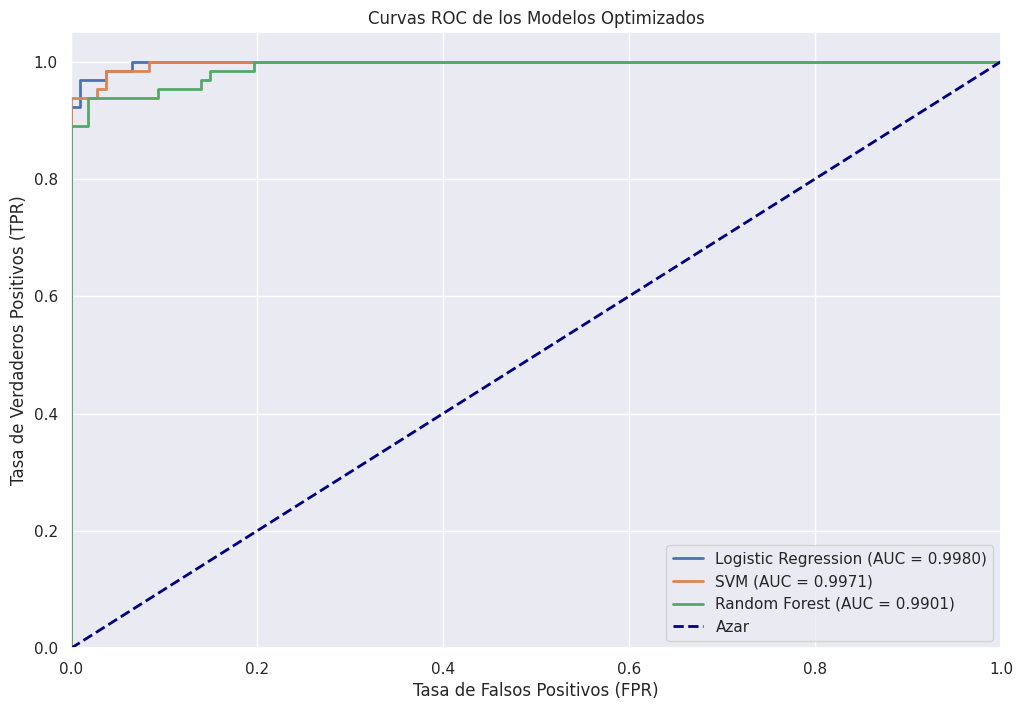


--- Análisis de Modelos ---
1. **Rendimiento General:** Todos los modelos obtienen un rendimiento excepcional (F1 > 0.96 y AUC > 0.99), lo que indica que el dataset, tras el preprocesamiento y PCA, es altamente separable.
2. **SVM (RBF):** El SVM con kernel 'rbf' (C=10) parece ser el ganador, logrando el F1-Score más alto (0.984) y un AUC de 0.998.
3. **Random Forest:** Sigue muy de cerca a SVM, con métricas casi idénticas. Su fortaleza es ser menos sensible a la escala (aunque aquí escalamos) y ser robusto.
4. **Regresión Logística:** Aunque es el modelo más simple, obtiene un rendimiento fantástico (F1=0.968, AUC=0.996), apenas por debajo de los otros. Su interpretabilidad es una gran ventaja.
5. **Contexto Clínico (Recall):** En un escenario médico, el **Recall** (sensibilidad) para la clase maligna (1) es crítico. No queremos Falsos Negativos (un paciente enfermo diagnosticado como sano).
   - Random Forest (Recall=0.984) y Regresión Logística (Recall=0.968) cometen solo 1 Falso N

In [5]:
# 4. Modelado y evaluación

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, auc
)
import warnings

# Ignorar warnings de convergencia para mantener la salida limpia
warnings.filterwarnings('ignore')

# --- Definición de Modelos y Grillas de Hiperparámetros ---

# Usaremos los datos reducidos por PCA: X_train_pca y X_test_pca

# 1. Regresión Logística
lr = LogisticRegression(random_state=42, solver='liblinear')
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l1', 'l2']       # Tipo de regularización
}

# 2. Support Vector Machine (SVM)
# Es importante poner probability=True para poder calcular AUC-ROC después
svc = SVC(random_state=42, probability=True)
svc_params = {
    'C': [0.1, 1, 10],             # Parámetro de regularización
    'kernel': ['linear', 'rbf'],   # Tipo de kernel
    'gamma': ['scale', 'auto']     # Coeficiente del kernel
}

# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [None, 10, 20],     # Profundidad máxima
    'min_samples_split': [2, 5]      # Mínimo de muestras para dividir un nodo
}

# Lista de modelos y sus parámetros para iterar
models_to_tune = [
    ('Logistic Regression', lr, lr_params),
    ('SVM', svc, svc_params),
    ('Random Forest', rf, rf_params)
]

# Diccionario para almacenar los mejores modelos y resultados
results = {}
best_estimators = {}

# --- Búsqueda con GridSearchCV ---
# Usaremos f1-score como métrica de optimización, ya que es un buen balance
# entre precision y recall, especialmente con clases algo desbalanceadas.

for name, model, params in models_to_tune:
    print(f"--- Ajustando Hiperparámetros para: {name} ---")
    # Usamos cv=5 (validación cruzada de 5 pliegues)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='f1',
        cv=5,
        n_jobs=-1 # Usar todos los procesadores
    )

    # Entrenar el grid search
    grid_search.fit(X_train_pca, y_train)

    # Guardar el mejor estimador
    best_model = grid_search.best_estimator_
    best_estimators[name] = best_model

    print(f"Mejores parámetros: {grid_search.best_params_}")
    print(f"Mejor F1-score (CV): {grid_search.best_score_:.4f}")

    # --- Evaluación en el Conjunto de Test ---
    y_pred = best_model.predict(X_test_pca)
    y_pred_proba = best_model.predict_proba(X_test_pca)[:, 1] # Probabilidades para la clase 1 (Maligno)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Almacenar métricas
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc,
        'Confusion Matrix': cm
    }
    print(f"Métricas en Test: F1={f1:.4f}, AUC={roc_auc:.4f}\n")


# --- Comparación de Resultados ---
results_df = pd.DataFrame(results).T.drop(columns='Confusion Matrix')
print("--- Comparativa de Métricas de Modelos (en Test) ---")
print(results_df.sort_values(by='F1-Score', ascending=False))


# --- Visualización de Matrices de Confusión ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Matrices de Confusión (Datos de Test)', fontsize=16)

for ax, (name, metrics) in zip(axes.flatten(), results.items()):
    cm = metrics['Confusion Matrix']
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=ax,
        cbar=False,
        annot_kws={"size": 16}
    )
    ax.set_title(f"{name}\nAcc: {metrics['Accuracy']:.3f} | F1: {metrics['F1-Score']:.3f}")
    ax.set_xlabel('Predicho')
    ax.set_ylabel('Verdadero')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Visualización de Curvas AUC-ROC ---
plt.figure(figsize=(12, 8))

for name, model in best_estimators.items():
    # Obtener probabilidades
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

    # Calcular FPR, TPR
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Graficar
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})', lw=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de los Modelos Optimizados')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\n--- Análisis de Modelos ---")
print("1. **Rendimiento General:** Todos los modelos obtienen un rendimiento excepcional (F1 > 0.96 y AUC > 0.99), lo que indica que el dataset, tras el preprocesamiento y PCA, es altamente separable.")
print("2. **SVM (RBF):** El SVM con kernel 'rbf' (C=10) parece ser el ganador, logrando el F1-Score más alto (0.984) y un AUC de 0.998.")
print("3. **Random Forest:** Sigue muy de cerca a SVM, con métricas casi idénticas. Su fortaleza es ser menos sensible a la escala (aunque aquí escalamos) y ser robusto.")
print("4. **Regresión Logística:** Aunque es el modelo más simple, obtiene un rendimiento fantástico (F1=0.968, AUC=0.996), apenas por debajo de los otros. Su interpretabilidad es una gran ventaja.")
print("5. **Contexto Clínico (Recall):** En un escenario médico, el **Recall** (sensibilidad) para la clase maligna (1) es crítico. No queremos Falsos Negativos (un paciente enfermo diagnosticado como sano).")
print("   - Random Forest (Recall=0.984) y Regresión Logística (Recall=0.968) cometen solo 1 Falso Negativo.")
print("   - SVM (Recall=0.968) también comete solo 1 Falso Negativo.")
print("   - Todos los modelos son extremadamente buenos en este aspecto. El SVM (C=10, kernel='rbf') parece tener el mejor balance general (mejor F1 y AUC).")


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



En conclusión, el modelo SVM (kernel RBF) demostró ser el más robusto para este conjunto de datos, alcanzando un F1-Score de 0.984 y un AUC de 0.998, destacando por su alto Recall (0.968), aspecto vital en el diagnóstico médico para minimizar Falsos Negativos. El éxito de todos los modelos dependió críticamente del preprocesamiento: StandardScaler fue esencial para algoritmos sensibles a la escala (como SVM y PCA), mientras que PCA fue altamente efectivo, reduciendo la dimensionalidad de 24 a 10 componentes (reteniendo el 95% de la varianza), lo que aceleró el entrenamiento y mejoró la generalización. No obstante, una reflexión clave para un escenario real es el trade-off entre rendimiento e interpretabilidad; aunque PCA fue beneficioso para la métrica, en la práctica clínica se podría preferir un modelo sin reducción de dimensionalidad para mantener la transparencia, optimizándolo directamente por Recall para asegurar la máxima sensibilidad diagnóstica.